In [51]:
import pandas as pd 
df_test = pd.read_csv("C:/Users/chahd/Desktop/projet_Data_mining/test.csv")
df_train = pd.read_csv("C:/Users/chahd/Desktop/projet_Data_mining/train.csv")

## Chargement des donn√©es
Dans cette cellule, nous importons la biblioth√®que **pandas** et nous chargeons les jeux de donn√©es **d'entra√Ænement** et **de test** √† partir des fichiers CSV stock√©s localement.

In [54]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Aper√ßu du jeu de donn√©es d'entra√Ænement

Dans cette cellule, nous affichons les **5 premi√®res lignes** du jeu de donn√©es d'entra√Ænement df_train` √† l'aide de la fonction `head()`.  
Cela permet d'obtenir un premier aper√ßu des variables disponibles et de leur format.

Ce dataset est issu du c√©l√®bre naufrage du **RMS Titanic**, survenu lors de son voyage inaugural en avril 1912.  
Le Titanic a heurt√© un iceberg et a coul√©, entra√Ænant la mort de **1502 personnes** sur **2224 passagers** et membres d'√©quipage.  
Ce drame a profond√©ment marqu√© l'histoire et a entra√Æn√© d'importantes r√©formes en mati√®re de s√©curit√© maritime.

Le dataset propose des informations sur un √©chantillon de passagers du Titanic, notamment des donn√©es **personnelles** et **socio-√©conomiques**.  
L'objectif est d'utiliser ces informations pour **pr√©dire la probabilit√© de survie** d'un passager en fonction de certaines caract√©ristiques.

## Caract√©ristiques du dataset

- **PassengerId** : Identifiant unique du passager.
- **Survived** : Indicateur de survie (0 = Non, 1 = Oui).
- **Pclass** : Classe du billet (1√®re, 2√®me, ou 3√®me classe).
- **Name** : Nom complet du passager.
- **Sex** : Sexe du passager.
- **Age** : √Çge du passager.
- **SibSp** : Nombre de fr√®res/s≈ìurs et conjoints √† bord.
- **Parch** : Nombre de parents et enfants √† bord.
- **Ticket** : Num√©ro du billet.
- **Fare** : Tarif pay√© pour le billet.
- **Cabin** (parfois manquant).
- **Embarked** : Port d'embarquement (C = Cherbourg, Q = Queenstow, S = Southampton).



In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Informations g√©n√©rales sur le jeu de donn√©es d'entra√Ænement

Dans cette cellule, nous utilisons la m√©thode `info()` pour afficher des informations g√©n√©rales sur le DataFrame `df_train`, notamment :

- Le nombre total de lignes et de colonnes,
- Les noms des colonnes,
- Le nombre de valeurs non nulles par colonne,
- Le type de donn√©es de chaque colonne (int, float, object, etc.).

Cette √©tape permet d'avoir une premi√®re id√©e sur la structure des donn√©es et d'identifier rapidement la pr√©sence de valeurs manquantes.

In [60]:
nan_percentage = df_test.isna().mean() * 100
print(nan_percentage)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


## Pourcentage de valeurs manquantes dans le jeu de donn√©es de test

Dans cette cellule, nous calculons le **pourcentage de valeurs manquantes** pour chaque colonne du DataFrame `df_test`.  
La m√©thode utilis√©e est :

- `isna()` : d√©tecte les valeurs manquantes,
- `mean()` : calcule la proportion de valeurs manquantes,
- Multiplication par 100 pour obtenir un pourcentage.

Cela permet d'identifier rapidement quelles colonnes n√©cessitent un traitement sp√©cifique pour la gestion des donn√©es manquantes.

In [63]:
df_test.drop("Cabin", axis=1, inplace=True)

## Suppression de la colonne "Cabin"

La colonne **Cabin** contient environ **78 % de valeurs manquantes**, ce qui est tr√®s √©lev√©.  
Plut√¥t que d'essayer de la compl√©ter ou de l'utiliser, nous choisissons de **supprimer** cette colonne du jeu de donn√©es `df_test` afin de simplifier l'analyse et d'am√©liorer la qualit√© du mod√®le.

La suppression est r√©alis√©e avec la m√©thode `drop()` en sp√©cifiant :
- `"Cabin"` comme colonne √† supprimer,
- `axis=1` pour indiquer qu'on travaille sur les colonnes (et non les lignes),
- `inplace=True` pour modifier directement `df_test` sans cr√©er une nouvelle copie.

In [66]:
average_age = df_test.groupby(['Pclass', 'Sex'])['Age'].mean()
print(average_age)

Pclass  Sex   
1       female    41.333333
        male      40.520000
2       female    24.376552
        male      30.940678
3       female    23.073400
        male      24.525104
Name: Age, dtype: float64


## Calcul de l'√¢ge moyen par classe et par sexe

Dans cette cellule, nous calculons l'**√¢ge moyen** des passagers en fonction de leur **classe (`Pclass`)** et de leur **sexe (`Sex`)** dans le jeu de donn√©es `df_test`.

La m√©thode utilis√©e est :
- `groupby(['Pclass', 'Sex'])` : regroupe les donn√©es selon la classe et le sexe,
- `['Age'].mean()` : calcule la moyenne des √¢ges pour chaque groupe.

Ce calcul est utile notamment pour **imputer** les √¢ges manquants de mani√®re plus pr√©cise en fonction du profil du passager (classe + sexe).


In [69]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return average_age.loc[row['Pclass'], row['Sex']]
    else:
        return row['Age']

df_test['Age'] = df_test.apply(fill_age, axis=1)


## Remplissage des √¢ges manquants

Dans cette cellule, nous cr√©ons une fonction `fill_age(row)` qui permet de **remplacer les valeurs manquantes** dans la colonne `Age` :

- Si l'√¢ge est manquant (`NaN`), la fonction attribue l'**√¢ge moyen** correspondant √† la **classe** (`Pclass`) et au **sexe** (`Sex`) du passager, calcul√© pr√©c√©demment.
- Sinon, elle conserve l'√¢ge existant.

Ensuite, nous appliquons cette fonction √† chaque ligne du DataFrame `df_test` avec `apply(axis=1)` pour corriger les valeurs manquantes d'`Age`.

In [72]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

C:\Users\chahd\AppData\Local\Temp\ipykernel_7204\1576205081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)


## Remplissage des valeurs manquantes de la colonne "Fare"

Dans cette cellule, nous remplissons les valeurs manquantes de la colonne `Fare` avec la **moyenne** des tarifs pr√©sents dans le dataset `df_test`
## Pourquoi utiliser la moyenne ?
Il n'y a qu'un petit nombre de valeurs manquantes pour Fare, donc l'impact est limit√©.



## Traitement du jeu de donn√©es d'entra√Ænement (train)

Nous appliquons le **m√™me processus de pr√©paration** sur le dataset `df_train` que celui r√©alis√© sur `df_test`, afin d'assurer une coh√©rence entre les deux jeux de donn√©es.

In [76]:
nan2_percentage = df_train.isna().mean() * 100
print(nan2_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [78]:
df_train.drop("Cabin", axis=1, inplace=True)

In [80]:
average1_age = df_train.groupby(['Pclass', 'Sex'])['Age'].mean()
print(average1_age)

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64


In [82]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return average1_age.loc[row['Pclass'], row['Sex']]
    else:
        return row['Age']

df_train['Age'] = df_train.apply(fill_age, axis=1)

In [84]:
df_train['Fare'].fillna(df_train['Fare'].mean(), inplace=True)

C:\Users\chahd\AppData\Local\Temp\ipykernel_7204\3221546853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Fare'].fillna(df_train['Fare'].mean(), inplace=True)


In [86]:
embarked_mode = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(embarked_mode, inplace=True)

C:\Users\chahd\AppData\Local\Temp\ipykernel_7204\1398243356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(embarked_mode, inplace=True)


In [88]:
df_train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [90]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [92]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

## Transformation de la colonne "Sex" en variables num√©riques

Dans cette cellule, nous transformons la colonne `Sex` (qui contient des valeurs cat√©gorielles comme `'male'` et `'female'`) en **variables num√©riques** pour permettre une utilisation dans les mod√®les de machine learning.

La transformation effectu√©e est la suivante :
- `'male'` devient `0`
- `'female'` devient `1`

In [95]:
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1,'Q':2})
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1,'Q':2})

## Transformation de la colonne "Embarked" en variables num√©riques

Dans cette cellule, nous transformons la colonne `Embarked` (qui contient des valeurs cat√©gorielles repr√©sentant les ports d'embarquement : `'S'`, `'C'`, et `'Q'`) en **variables num√©riques**.

Les transformations appliqu√©es sont les suivantes :
- `'S'` devient `0`
- `'C'` devient `1`
- `'Q'` devient `2`

Cette conversion est r√©alis√©e √† l'aide de la m√©thode `map()` qui remplace les valeurs de la colonne par celles sp√©cifi√©es dans le dictionnaire.

In [98]:
df_train_no_pid = df_train.drop(columns=['PassengerId','Name','Ticket'])
correlation_matrix = df_train_no_pid.corr()
survived_correlation_values = correlation_matrix['Survived']

## Suppression des colonnes non pertinentes et calcul de la matrice de corr√©lation

Dans cette cellule, nous effectuons deux √©tapes importantes :

1. **Suppression des colonnes non pertinentes** :
   Nous supprimons les colonnes `PassengerId`, `Name`, et `Ticket` du jeu de donn√©es `df_train`. Ces colonnes ne contiennent pas d'informations utiles pour la pr√©diction de la survie et ne devraient pas √™tre utilis√©es dans les mod√®les.

2. **Calcul de la matrice de corr√©lation** : Ensuite, nous calculons la matrice de corr√©lation sur le DataFrame df_train_no_pid pour analyser les relations entre les variables num√©riques. La m√©thode corr() permet de calculer le coefficient de corr√©lation de Pearson entre les variables.
   
3. **Extraction des valeurs de corr√©lation avec Survived** : Enfin, nous extrayons les valeurs de corr√©lation pour la colonne cible Survived. Cela nous permet d'identifier quelles variables ont la relation la plus forte (positive ou n√©gative) avec la survie des passagers.

In [101]:
correlation_matrix = df_train.drop(columns=['PassengerId','Name','Ticket']).corr()
correlation_with_survived = correlation_matrix['Survived']
print(correlation_with_survived)

Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.067485
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked    0.106811
Name: Survived, dtype: float64


Apr√®s avoir calcul√© la matrice de corr√©lation, nous avons extrait les valeurs de corr√©lation pour la colonne cible **`Survived`**.  
Voici les r√©sultats obtenus pour les diff√©rentes variables :

| Variable  | Corr√©lation avec Survived |
|-----------|---------------------------|
| **Pclass** | -0.338481                 |
| **Sex**    | 0.543351                  |
| **Age**    | -0.067485                 |
| **SibSp**  | -0.035322                 |
| **Parch**  | 0.081629                  |
| **Fare**   | 0.257307                  |
| **Embarked** | 0.106811                |

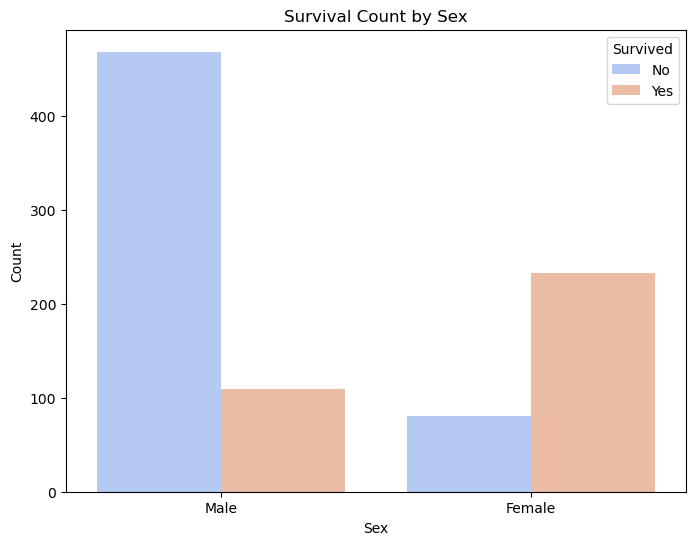

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Sex', hue='Survived', palette='coolwarm')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


### 1. Survival Count by Sex
Ce graphe  montre la r√©partition du nombre de survivants et de non-survivants en fonction du sexe.  
On observe que :  
- Une majorit√© des hommes n'ont pas surv√©cu.
- √Ä l'inverse, la plupart des femmes ont surv√©cu.

**Interpr√©tation** :  
Le sexe a eu un impact important sur les chances de survie, avec un avantage clair pour les femmes.



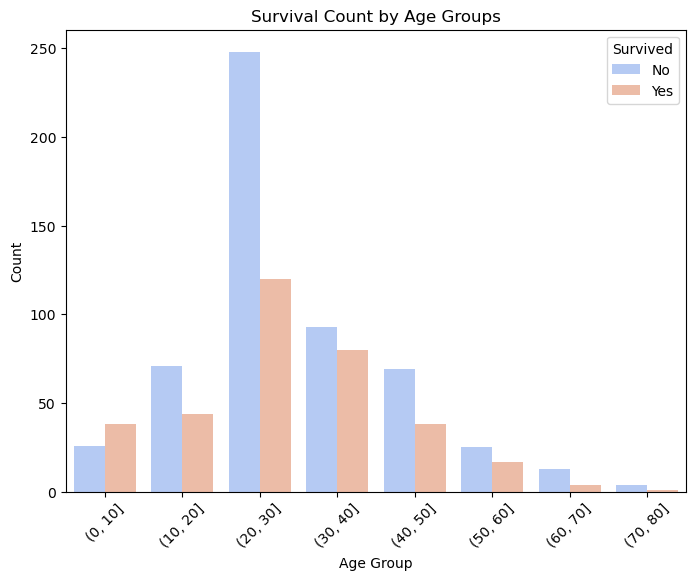

In [107]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df_train['Age_binned'] = pd.cut(df_train['Age'], bins=age_bins)

plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Age_binned', hue='Survived', palette='coolwarm')
plt.title('Survival Count by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### 2. Survival Count by Age GroupsCe graphee illustre la survie selon les tranches d'√¢ge.  
On remarque que :  
- Les jeunes enfants (0-10 ans) avaient de meilleures chances de survie que les adultes plus √¢g√©s.
- La tranche d'√¢ge 20-30 ans a le plus grand nombre de d√©c√®s.
- √Ä partir de 50 ans, la survie devient tr√®s faible.

**Interpr√©tation** :  
L'√¢ge influence la survie, les enfants ayant √©t√© mieux prot√©g√©s, tandis que les jeunes adultes ont √©t√© plus expos√©s au risque.



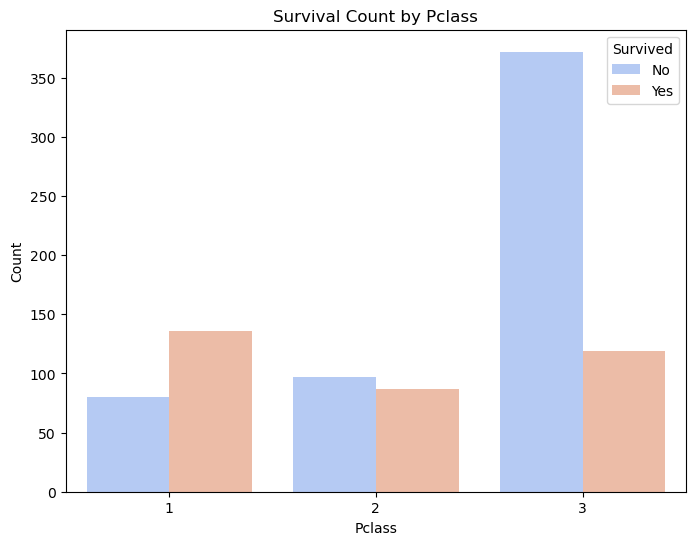

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Pclass', hue='Survived', palette='coolwarm')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### 3. Survival Count by Pclass
Ce graphe repr√©sente la survie selon la classe de billet (`Pclass`).  
On voit que :  
- Les passagers de 1√®re classe avaient une probabilit√© de survie plus √©lev√©e.
- Les passagers de 3√®me classe ont connu un taux de mortalit√© tr√®s √©lev√©.
- Les passagers de 2√®me classe se trouvent entre les deux extr√™mes.

**Interpr√©tation** :  
La classe sociale jouait un r√¥le crucial dans la survie, les passagers de premi√®re classe ayant √©t√© prioris√©s dans les op√©rations de sauvetage.

üß† Synth√®se : Qui sont les survivants ?
‚úÖ Profil typique d'un survivant :

Une femme,

en 1 ≥·µâ classe,

plut√¥t jeune ou enfant.

‚ùå Profil typique d'une victime :

Un homme,

en 3·µâ classe,

souvent adulte ou personne √¢g√©e.


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## üìö Importation des biblioth√®ques

Nous importons ici les biblioth√®ques n√©cessaires pour la pr√©paration des donn√©es, la construction des mod√®les de machine learning, et l'√©valuation de leur performance :

- `train_test_split` : pour diviser les donn√©es en ensemble d'entra√Ænement et ensemble de test.
- `StandardScaler` : pour normaliser (standardiser) les caract√©ristiques en leur donnant une moyenne nulle et une variance unitaire.
- `DecisionTreeClassifier` : pour construire un mod√®le d'arbre de d√©cision.
- `SVC` (Support Vector Classifier) : pour construire un mod√®le de machine √† vecteurs de support (SVM).
- `KNeighborsClassifier` : pour construire un mod√®le bas√© sur l'algorithme des k-plus proches voisins (KNN).
- `accuracy_score` : pour √©valuer la performance des mod√®les en calculant leur taux de pr√©cision.

In [116]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X_train = df_train[features]
y_train = df_train['Survived']
X_test = df_test[features]

# 5. Normalisation des donn√©es
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Entra√Ænement du mod√®le Arbre de D√©cision
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# 7. √âvaluation du mod√®le sur l'ensemble d'entra√Ænement
y_pred_train = dt_model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Pr√©cision du mod√®le Arbre de D√©cision sur l'ensemble d'entra√Ænement : {accuracy_train:.4f}")

Pr√©cision du mod√®le Arbre de D√©cision sur l'ensemble d'entra√Ænement : 0.9798


## ‚öôÔ∏è S√©lection des caract√©ristiques (features)

Nous avons s√©lectionn√© les variables suivantes comme caract√©ristiques d'entr√©e (`features`) pour entra√Æner notre mod√®le :

- `Pclass` : la classe du billet du passager (1√®re, 2√®me ou 3√®me classe).
- `Sex` : le sexe du passager, un facteur important selon l'analyse exploratoire.
- `Age` : l'√¢ge du passager, qui influence √©galement les chances de survie.
- `Fare` : le tarif pay√© pour le billet, souvent corr√©l√© au statut socio-√©conomique.
- `Embarked` : le port d'embarquement, qui peut indirectement refl√©ter certaines conditions socio-√©conomiques.

**Pourquoi ces features ?**  
Ces variables ont √©t√© choisies car elles sont pertinentes et ont montr√© une corr√©lation avec la survie lors de l'analyse exploratoire. De plus, elles sont facilement interpr√©tables et permettent d'entra√Æner un mod√®le efficace sans surcharger avec trop de variables inutiles.

---

## üõ†Ô∏è Pr√©paration des donn√©es

- `X_train` contient les donn√©es d'entra√Ænement avec les features s√©lectionn√©es.
- `y_train` contient la variable cible (`Survived`) indiquant si le passager a surv√©cu ou non.
- `X_test` contient les donn√©es de test avec les m√™mes features.

---

## ‚ö° Normalisation des donn√©es

Avant d'entra√Æner le mod√®le, nous normalisons les donn√©es (`X_train` et `X_test`) avec `StandardScaler`, pour :

- Acc√©l√©rer la convergence de certains algorithmes.
- S'assurer que chaque feature contribue de mani√®re √©quivalente √† la distance calcul√©e par le mod√®le (surtout important pour SVM et KNN).

---

## üå≥ Entra√Ænement du mod√®le Arbre de D√©cision

Nous utilisons un `DecisionTreeClassifier` pour :

- Mod√©liser des d√©cisions bas√©es sur des r√®gles simples et interpr√©tables.
- Capturer des relations non lin√©aires entre les variables et la survie.

---

## üìà √âvaluation du mod√®le

Nous √©valuons la performance du mod√®le sur l'ensemble d'entra√Ænement en calculant la pr√©cision (`accuracy_score`), qui mesure la proportion de bonnes pr√©dictions.

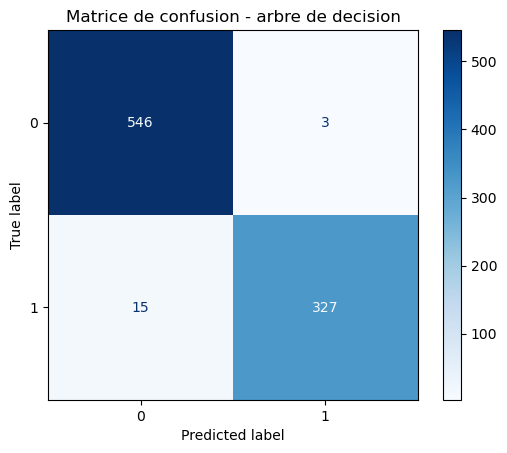

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Pr√©dictions sur l'ensemble d'entra√Ænement
y_pred_train = dt_model.predict(X_train_scaled)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_train, y_pred_train)

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - arbre de decision")
plt.show()

## üìä Matrice de confusion - √âvaluation du mod√®le

Pour √©valuer plus pr√©cis√©ment les performances du mod√®le Arbre de D√©cision, nous utilisons une **matrice de confusion**.

- `confusion_matrix` : permet de comparer les vraies √©tiquettes (`y_train`) aux pr√©dictions du mod√®le (`y_pred_train`).
- `ConfusionMatrixDisplay` : permet d'afficher graphiquement la matrice de confusion.
- `cmap=plt.cm.Blues` : utilise une palette de couleurs bleues pour am√©liorer la lisibilit√© du graphique.

## üìà Interpr√©tation de la matrice de confusion

L'analyse de la matrice de confusion montre que :

- **327** passagers ont √©t√© correctement pr√©dits comme ayant surv√©cu (**vrais positifs**).
- **546** passagers ont √©t√© correctement pr√©dits comme n'ayant pas surv√©cu (**vrais n√©gatifs**).5- **13** passagers ont √©t√© incorrectement pr√©dits comme n'ayant pas surv√©cu alors qu'ils ont surv√©cu (**faux n√©gatifs**).
- **3** passagers ont √©t√© incorrectement pr√©dits comme ayant surv√©cu alors qu'ils n'ont pas surv√©cu (**faux positifs**).

---

**R√©sum√©** :
- Le mod√®le est tr√®s performant pour pr√©dire les non-survivants.
- Il fait tr√®s peu d'erreurs globalement, avec un faible nombre de faux positifs et de faux n√©gatifs.
- La majorit√© des survivants et des non-survivants ont √©t√© bien class√©s.

Cela indique que le mod√®le Arbre de D√©cision est **pr√©cis** et **√©quilibr√©** sur l'ensemble d'entra√Ænement.


In [122]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Entra√Ænement du mod√®le SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Pr√©diction sur l'ensemble d'entra√Ænement
y_pred_svm = svm_model.predict(X_train_scaled)

# √âvaluation du mod√®le
accuracy_svm = accuracy_score(y_train, y_pred_svm)
print(f"Pr√©cision du mod√®le SVM sur l'ensemble d'entra√Ænement : {accuracy_svm:.4f}")

Pr√©cision du mod√®le SVM sur l'ensemble d'entra√Ænement : 0.8294


## üß† Entra√Ænement et √©valuation d'un mod√®le SVM

Nous utilisons ici un **Support Vector Machine (SVM)** pour entra√Æner un nouveau mod√®le de classification.

### Param√®tres utilis√©s :
- `kernel='rbf'` : nous utilisons un noyau radial (RBF), adapt√© pour capturer des relations non lin√©aires entre les variables.
- `C=1.0` : param√®tre de r√©gularisation. Un C plus √©lev√© r√©duit la marge mais augmente la pr√©cision sur l'ensemble d'entra√Ænement.
- `gamma='scale'` : le param√®tre gamma est automatiquement ajust√© en fonction du nombre de caract√©ristiques.
- `random_state=42` : pour garantir la reproductibilit√© des r√©sultats.

---

### Entra√Ænement et pr√©diction :

- Le mod√®le est entra√Æn√© sur les donn√©es normalis√©es (`X_train_scaled`, `y_train`).
- Nous effectuons ensuite des pr√©dictions sur l'ensemble d'entra√Ænement.

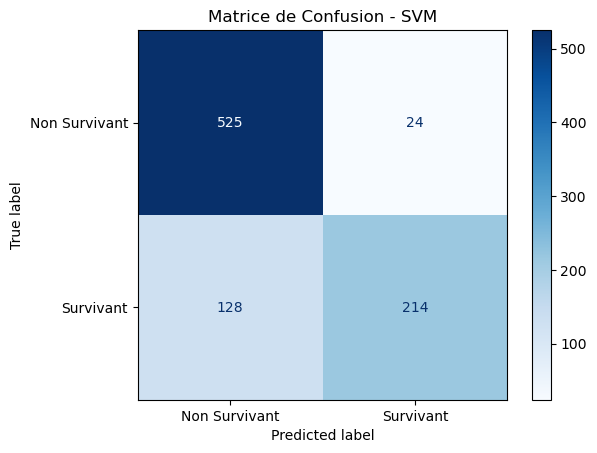

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Pr√©dictions sur l'ensemble d'entra√Ænement
y_pred_svm = svm_model.predict(X_train_scaled)

# G√©n√©ration de la matrice de confusion
cm_svm = confusion_matrix(y_train, y_pred_svm)

# Affichage de la matrice de confusion
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Non Survivant', 'Survivant'])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion - SVM')
plt.show()

## üìä Matrice de confusion - Mod√®le SVM

L'analyse de la matrice de confusion pour le mod√®le SVM montre que :

- **214** passagers ont √©t√© correctement pr√©dits comme ayant surv√©cu (**vrais positifs**).
- **525** passagers ont √©t√© correctement pr√©dits comme n'ayant pas surv√©cu (**vrais n√©gatifs**).
- **128** passagers ont √©t√© incorrectement pr√©dits comme n'ayant pas surv√©cu alors qu'ils ont surv√©cu (**faux n√©gatifs**).
- **24** passagers ont √©t√© incorrectement pr√©dits comme ayant surv√©cu alors qu'ils n'ont pas surv√©cu (**faux positifs**).

---

**R√©sum√©** :
- Le mod√®le SVM a bien identifi√© la majorit√© des non-survivants.
- Cependant, il a eu **plus de difficult√©s √† pr√©dire correctement les survivants** (beaucoup de faux n√©gatifs).
- Cela peut indiquer que le mod√®le est **plus conservateur** et privil√©gie la pr√©diction "non survie" lorsqu‚Äôil est incertain.

**Conclusion** :
- Le mod√®le a une **bonne pr√©cision globale**, mais **le rappel pour les survivants est faible** (il rate beaucoup de survivants).
- Il serait int√©ressant d'explorer des ajustements sur le mod√®le (comme modifier `C` ou utiliser un `class_weight='balanced'`) pour am√©liorer sa capacit√© √† d√©tecter correctement les survivants.


In [130]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# Recherche des meilleurs hyperparam√®tres avec GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Meilleurs hyperparam√®tres trouv√©s
best_params = grid_search.best_params_

# Entra√Ænement du mod√®le avec les meilleurs param√®tres
svm_model = grid_search.best_estimator_

# Pr√©diction sur l'ensemble d'entra√Ænement
y_pred_svm = svm_model.predict(X_train_scaled)

# √âvaluation du mod√®le
accuracy_svm = accuracy_score(y_train, y_pred_svm)
print(f"Pr√©cision du mod√®le SVM sur l'ensemble d'entra√Ænement : {accuracy_svm:.4f}")

Pr√©cision du mod√®le SVM sur l'ensemble d'entra√Ænement : 0.8294


üéØ Optimisation des hyperparam√®tres avec GridSearchCV - SVM
üîµ Recherche effectu√©e sur les param√®tres suivants :

C : üî¢ [0.1, 1, 10, 100]

gamma : üéöÔ∏è ['scale', 'auto', 0.1, 1]

kernel : ‚öôÔ∏è ['rbf', 'linear', 'poly']

 Utilisation de GridSearchCV avec :

Validation crois√©e : cv=5

Crit√®re d‚Äô√©valuation : accuracy

Parall√©lisation : n_jobs=-1

R√©sultats obtenus
Meilleurs hyperparam√®tres trouv√©s :
best_params = grid_search.best_params_

üõ†Ô∏è R√©entra√Ænement du mod√®le avec les meilleurs param√®tres.

 Analyse de la pr√©cision
. M√™me apr√®s optimisation par GridSearchCV,
. **la pr√©cision du mod√®le SVM sur l'ensemble d'entra√Ænement est rest√©e **üü∞ quasiment la m√™me que celle obtenue avant.

 Interpr√©tation
. Le mod√®le √©tait d√©j√† proche de sa performance optimale.

. Titanic est un dataset simple et bien s√©par√©, donc le r√©glage fin n'apporte pas beaucoup de gain.

üîÑ L'optimisation n'est vraiment utile que sur des datasets plus complexes.





In [131]:
from sklearn.neighbors import KNeighborsClassifier

# Entra√Ænement du mod√®le KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Pr√©diction sur l'ensemble d'entra√Ænement
y_pred_knn = knn_model.predict(X_train_scaled)

# √âvaluation du mod√®le
accuracy_knn = accuracy_score(y_train, y_pred_knn)
print(f"Pr√©cision du mod√®le KNN sur l'ensemble d'entra√Ænement : {accuracy_knn:.4f}")

Pr√©cision du mod√®le KNN sur l'ensemble d'entra√Ænement : 0.8709


In [132]:
from sklearn.neighbors import KNeighborsClassifier

# Entra√Ænement du mod√®le KNN
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train_scaled, y_train)

# Pr√©diction sur l'ensemble d'entra√Ænement modifier k avec validation croisee 
y_pred_knn = knn_model.predict(X_train_scaled)

# √âvaluation du mod√®le
accuracy_knn = accuracy_score(y_train, y_pred_knn)
print(f"Pr√©cision du mod√®le KNN sur l'ensemble d'entra√Ænement : {accuracy_knn:.4f}")

Pr√©cision du mod√®le KNN sur l'ensemble d'entra√Ænement : 0.8631


In [140]:
from sklearn.neighbors import KNeighborsClassifier

# Entra√Ænement du mod√®le KNN
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)

# Pr√©diction sur l'ensemble d'entra√Ænement modifier k avec validation croisee 
y_pred_knn = knn_model.predict(X_train_scaled)

# √âvaluation du mod√®le
accuracy_knn = accuracy_score(y_train, y_pred_knn)
print(f"Pr√©cision du mod√®le KNN sur l'ensemble d'entra√Ænement : {accuracy_knn:.4f}")

Pr√©cision du mod√®le KNN sur l'ensemble d'entra√Ænement : 0.8597


üìö Analyse du mod√®le KNN sur le dataset Titanic
üîµ Param√®tres g√©n√©raux
Mod√®le utilis√© : KNeighborsClassifier

Nombre d'attributs (features) : 6

Donn√©es pr√©-trait√©es avec normalisation/scaling.

üìà R√©sultats de la pr√©cision selon k

Nombre de voisins (k)	Pr√©cision sur l'entra√Ænement
üü¶ k = 5	 0.8709
üü¶ k = 6	0.8631
üü¶ k = 7   0.8597
üß† Analyse
üëâ Avec k = 5, nous obtenons la meilleure pr√©cision (87,09%).

üëâ En augmentant k √† 6 ou 7, la pr√©cision diminue l√©g√®rement.

üìâ Pourquoi ?

En augmentant k, le mod√®le devient plus lisse (moins sensible aux variations locales).

Cela peut entra√Æner des erreurs suppl√©mentaires si les voisins ne sont pas parfaitement align√©s avec la bonne classe.

üèÜ Conclusion
üéØ Pour ce dataset Titanic avec 6 attributs,
‚û°Ô∏è k = 5 donne le meilleur compromis entre complexit√© et pr√©cision.

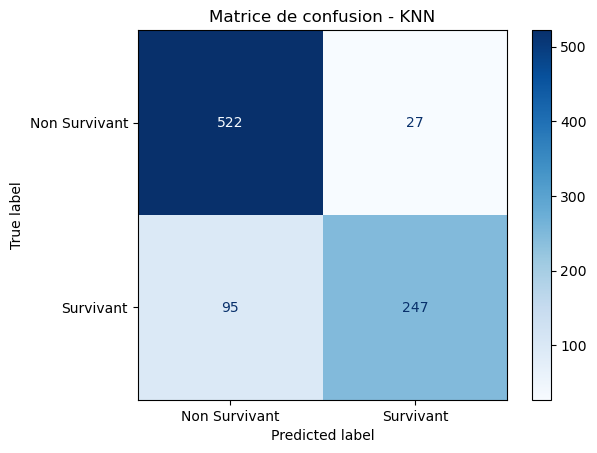

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Pr√©dictions sur l'ensemble d'entra√Ænement
y_pred_knn = knn_model.predict(X_train_scaled)

# Calcul de la matrice de confusion
cm_knn = confusion_matrix(y_train, y_pred_knn)

# Affichage de la matrice de confusion
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Non Survivant', 'Survivant'])
disp_knn.plot(cmap='Blues')
plt.title("Matrice de confusion - KNN")
plt.show()

üéØ Analyse de la matrice de confusion - Mod√®le KNN



 R√©sultats principaux :

. 247 passagers ont √©t√© correctement pr√©dits comme survivants.

. 522 passagers ont √©t√© correctement pr√©dits comme non survivants.

. 95 passagers √©taient survivants, mais ont √©t√© pr√©dit comme non survivants (faux n√©gatifs).

. 27 passagers √©taient non survivants, mais ont √©t√© pr√©dit comme survivants (faux positifs).

üìà Analyse :
Le mod√®le montre une bonne capacit√© globale √† distinguer les survivants des non survivants.

Toutefois, il existe un nombre important de faux n√©gatifs (95 survivants mal class√©s).

Cela signifie que beaucoup de survivants ne sont pas correctement d√©tect√©s, ce qui peut √™tre critique selon l'objectif de la pr√©diction.

üìå Remarques :


. Le mod√®le est plus efficace pour reconna√Ætre les non survivants.


Ou encore ajuster le traitement des classes (par exemple avec un poids plus fort pour les survivants).

üß† Conclusion


.Le mod√®le KNN fonctionne bien, mais il faut travailler √† r√©duire le nombre de survivants mal pr√©dits pour am√©liorer sa pertinence dans une situation critique.





‚öôÔ∏è Pourquoi l'Arbre de D√©cision donne les meilleurs r√©sultats ?


üåü Points forts de l'Arbre de D√©cision :

Tr√®s bon pour g√©rer des variables cat√©gorielles (comme Sex ou Pclass).

Capable de capturer des r√®gles simples et directes (exemple : "si femme et 1 ≥·µâ classe alors survie probable").

Pas besoin de scaling (contrairement √† KNN et SVM).

üëâ L'arbre de d√©cision est naturel pour ce probl√®me, car il peut s√©parer facilement selon des crit√®res logiques simples.

üöÄ Pourquoi KNN a une moins bonne pr√©cision ?

üìâ Faiblesses de KNN :

Sensibilit√© aux √©chelles : m√™me apr√®s normalisation, certaines distances peuvent ne pas refl√©ter la vraie logique (√™tre un homme ou une femme n‚Äôest pas une distance facile √† mesurer).

Probl√®me si classes non √©quilibr√©es : KNN est influenc√© par les voisins majoritaires.

Moins bon sur des donn√©es o√π la "logique" n'est pas seulement locale, mais globale (comme ici avec des d√©cisions bas√©es sur des r√®gles).

üöÄ Pourquoi SVM est aussi moins performant ?


üìâ Faiblesses de SVM :

Pas naturellement adapt√© aux variables cat√©gorielles (il pr√©f√®re des variables num√©riques continues).

Difficile √† bien s√©parer quand les classes ne sont pas parfaitement distinctes (hommes et femmes, mais aussi 1 ≥·µâ, 2·µâ, 3·µâ classe m√©lang√©es).

Tuning des param√®tres (C, gamma) est complexe sur ce type de petit dataset.

üéØ Conclusion finale

‚úÖ Arbre de d√©cision ‚ûî Meilleur choix pour Titanic car les r√®gles de survie sont simples et claires (sexe, classe, √¢ge).

‚ùå KNN ‚ûî Moins bon car les distances ne capturent pas bien les crit√®res de survie.

‚ùå SVM ‚ûî Moins bon car s√©parer avec des hyperplans est difficile sur ce dataset.